<a href="https://colab.research.google.com/github/RupeshSharma14/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# <b> Data Description </b>

### The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

### <b>Attribute Information: </b>

* Date : year-month-day
* Rented Bike count - Count of bikes rented at each hour
* Hour - Hour of the day
* Temperature-Temperature in Celsius
* Humidity - %
* Windspeed - m/s
* Visibility - 10m
* Dew point temperature - Celsius
* Solar radiation - MJ/m2
* Rainfall - mm
* Snowfall - cm
* Seasons - Winter, Spring, Summer, Autumn
* Holiday - Holiday/No holiday
* Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)


# **Importing Libraries**

In [1]:
# Importing data analysis and visualisation libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from google.colab import drive

%matplotlib inline

In [ ]:
# Importing feature engineering and model training libraries

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, make_scorer
from yellowbrick.model_selection import rfecv, LearningCurve, validation_curve
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Configuration for matplotlib graphs

matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000' 
sns.set_style('darkgrid');

# **Reading the dataset**

In [4]:
# Mounting the google drive

drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Loading the dataset 

path = "/content/drive/MyDrive/Bike Sharing Demand Prediction - Rupesh Sharma/SeoulBikeData.csv"
bike_df = pd.read_csv(path, encoding = "latin")

In [6]:
# Displaying the first five rows of the dataset

bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
# Displaying the last five rows of the dataset

bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [8]:
# Size of the dataset

bike_df.shape

(8760, 14)

The dataset consists of 8760 rows and 14 columns.



In [9]:
# Checking for duplicate rows in the data

bike_df.duplicated().sum()

0

There are no duplicate rows in the dataset.


In [10]:
# Checking for any NULL values

bike_df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

There is no missing values in the dataset.



In [11]:
# Checking for data types of variables

bike_df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

Date is an object data type. I should convert it into datetime datatype.



In [12]:
# Converting the data type of "Date" column to datetime object

bike_df["Date"] = bike_df["Date"].astype("datetime64")

In [13]:
# Extracting new features from "Date" column

bike_df['Year'] = bike_df['Date'].dt.year
bike_df['Month'] = bike_df['Date'].dt.month_name()
bike_df['Weekday'] = bike_df['Date'].dt.day_name()

In [14]:
# Dropping "Date" column

bike_df.drop(columns = "Date", inplace = True)

In [15]:
# Descriptive summary of the numerical attributes

bike_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


# **Exploratory Data Analysis**

### **Univariate Analysis**

**1. Dependent variable**

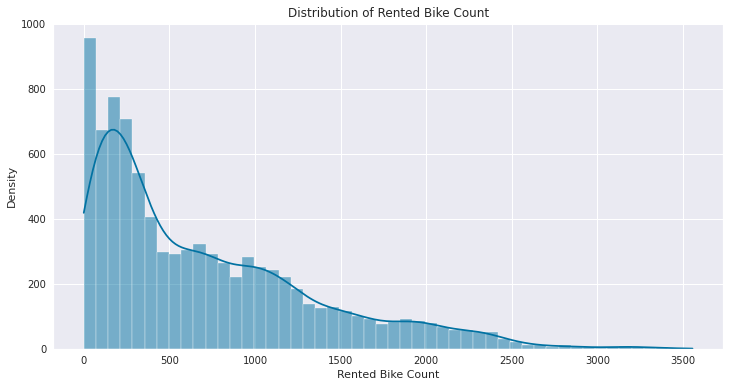

In [16]:
# Distribution of Dependent variable

sns.histplot(bike_df["Rented Bike Count"], kde = "True", bins = 50)
plt.title("Distribution of Rented Bike Count") 
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

plt.show()

**Insights:**
* The dependent variable is right skewed.





I will apply square root transformation  in later stage so that it becomes normally distributed. A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables. For now let's visualize how the dependent variable will look after transformation.

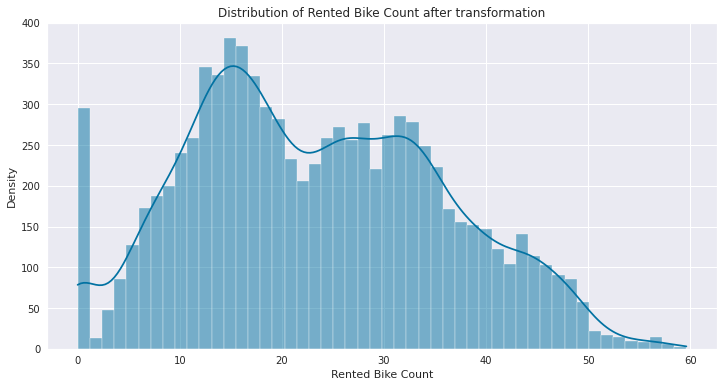

In [17]:
# Distribution of Dependent variable after transformation

sns.histplot(np.sqrt(bike_df["Rented Bike Count"]), kde = "True", bins = 50)
plt.title("Distribution of Rented Bike Count after transformation") 
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')
plt.show()

Now the distribution looks closer to normal distribution.



**2. Continuous variables**

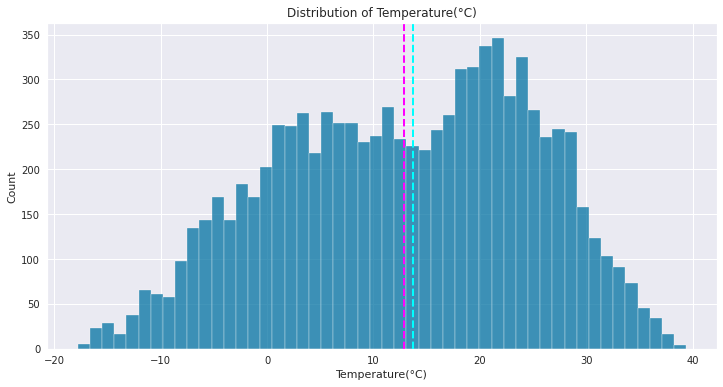

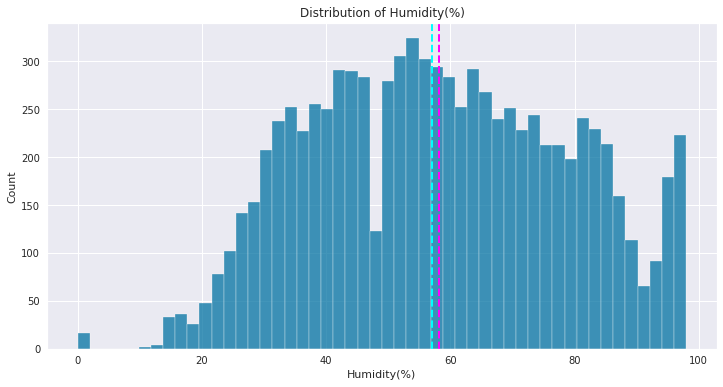

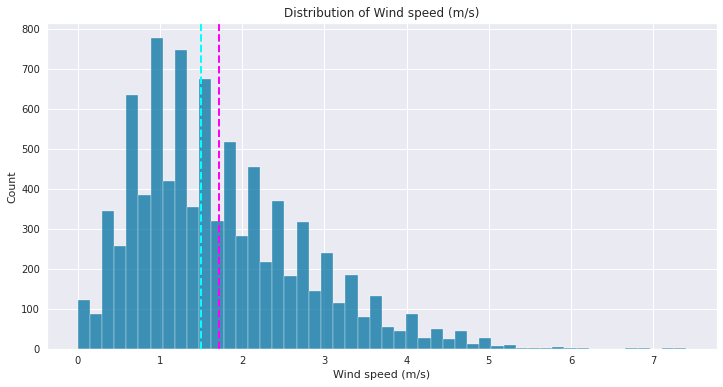

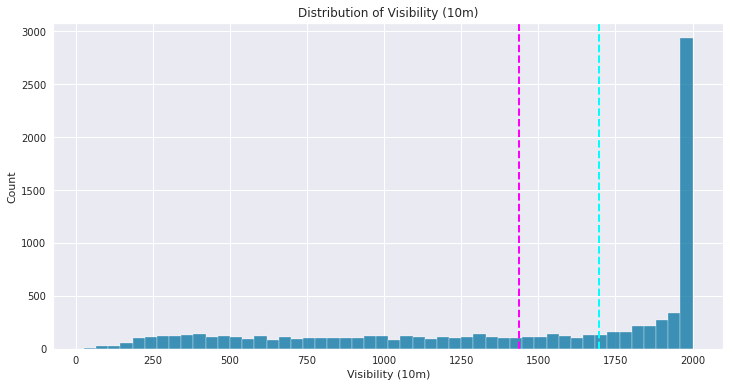

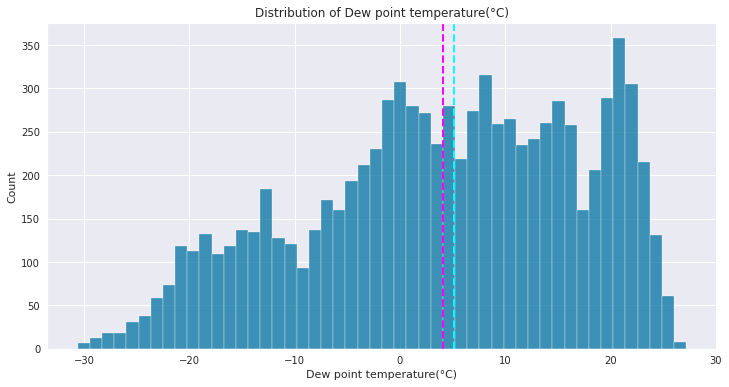

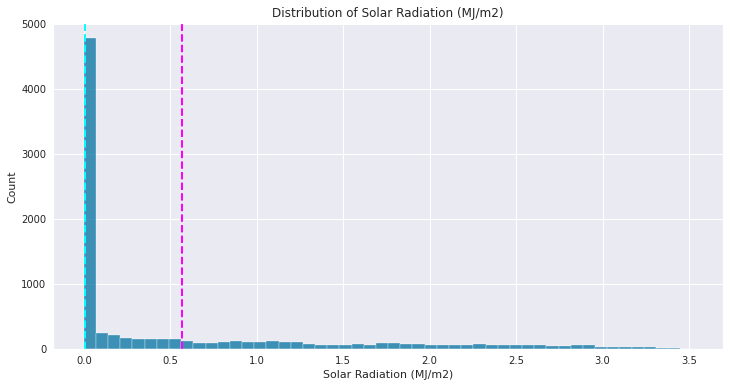

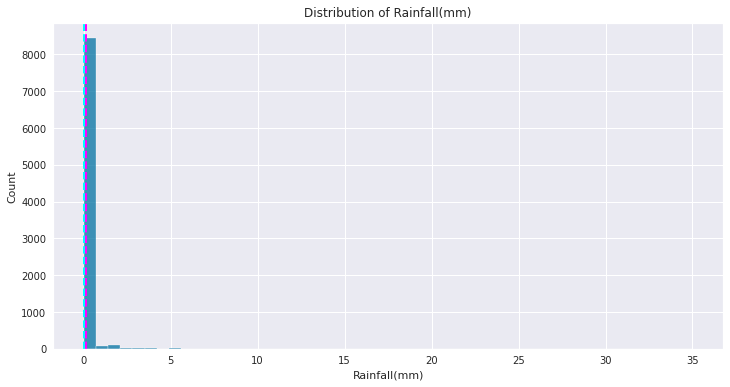

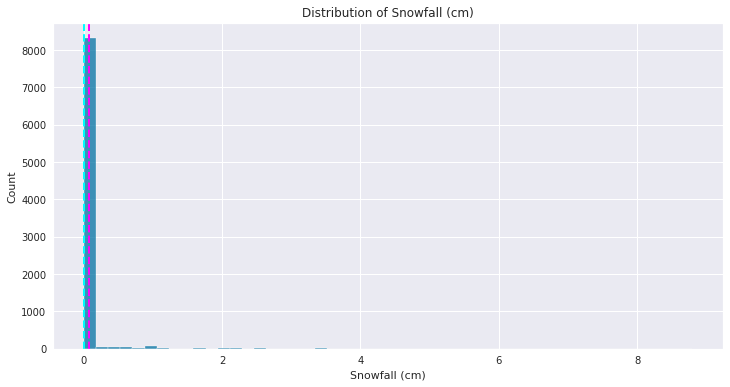

In [18]:
# Distribution of Continuous features

continuous_features =  ["Temperature(°C)", "Humidity(%)", "Wind speed (m/s)", "Visibility (10m)", "Dew point temperature(°C)",
                        "Solar Radiation (MJ/m2)", "Rainfall(mm)", "Snowfall (cm)"]

for col in continuous_features:
  fig = plt.figure(figsize = (12, 6))
  feature = bike_df[col]
  ax = fig.gca()
  sns.histplot(feature, bins = 50)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(f"Distribution of {col}") 

plt.show()

**Insights:**
* Most of the continuous features are skewed due to their inherent values.








Since skewed features are constituted of inherent values, changing their natural distribution is not a good option. On this dataset, robust machine learning models such as Decision Tree, Random Forest, and others would be substantially more efficient than other regression-based models which are sensitive to skewness, although it should be prudent to start with simple models as a baseline.

**3. Categorical variables**

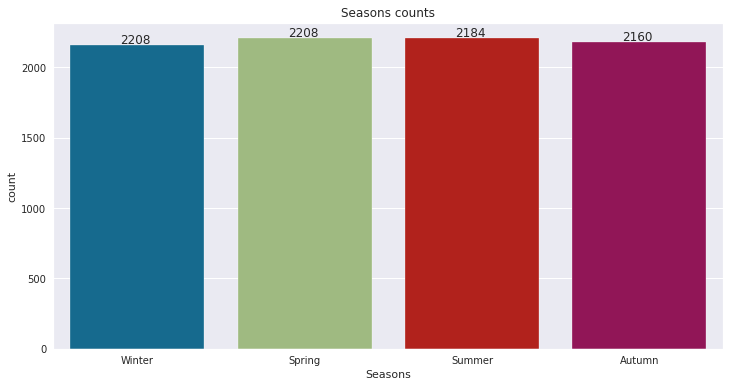

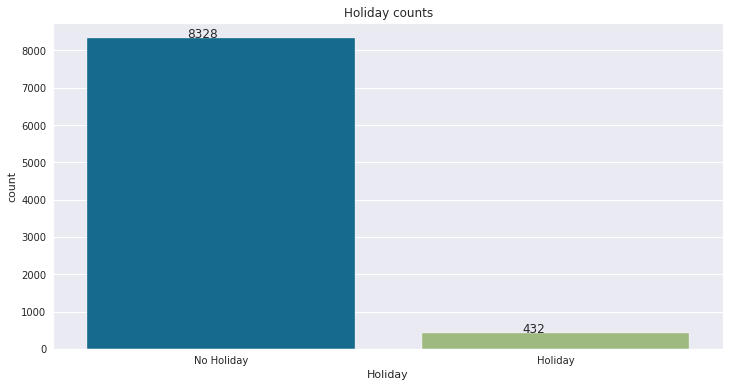

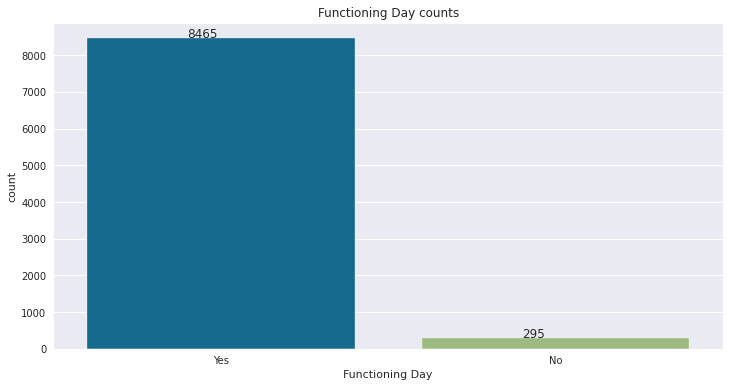

In [19]:
# Representation of Categorical features

categorical_features = ["Seasons", "Holiday", "Functioning Day"]

for col in categorical_features:
  fig = plt.figure(figsize = (12, 6))
  ax = fig.gca()
  feature = bike_df[col]
  ax = sns.countplot(x = feature)
  for p, label in zip(ax.patches, feature.value_counts().values):
    ax.annotate(label, (p.get_x()+0.300, p.get_height()+ 10))
    
  ax.set_title(col + " counts")

plt.show()

**Insights:** 
* All the seasons are equally represented in the data.
* In the dataset, holidays account for only 4.93 per cent of the overall.
* The dataset only has a 3.3 per cent representation of non-functioning days.

Since the data is from the years 2017 and 2018, these representations appear to be accurate within this time period.

**4. Cyclical variables**

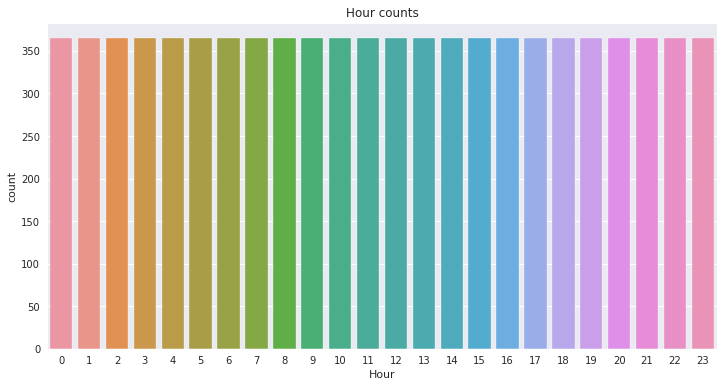

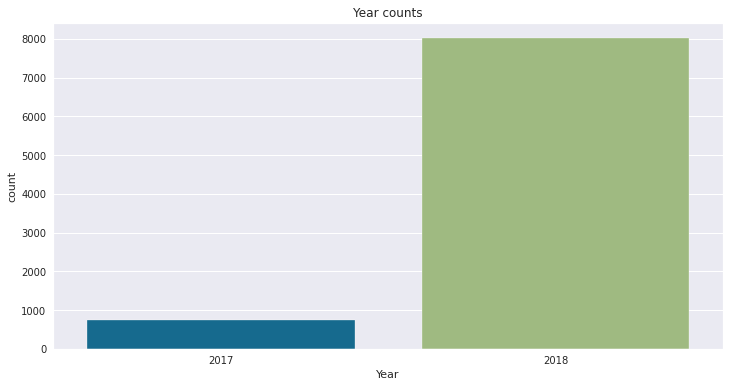

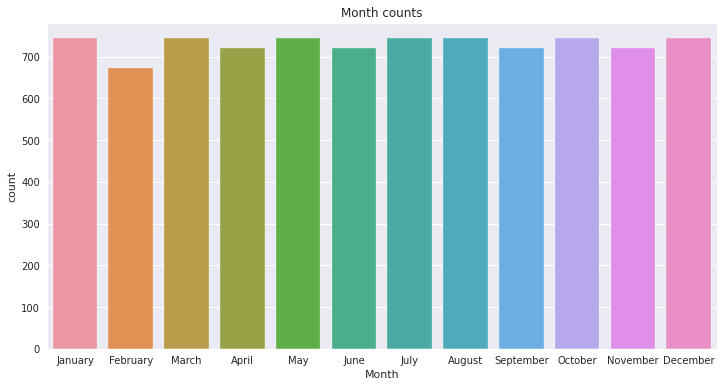

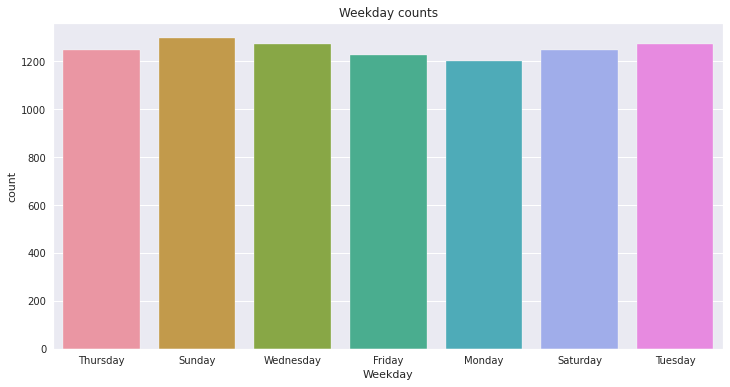

In [20]:
# Representation of Cylical features

cyclical_features = ["Hour", "Year", "Month", "Weekday"]

for col in cyclical_features:
  fig = plt.figure(figsize = (12, 6))
  ax = fig.gca()
  feature = bike_df[col]
  ax = sns.countplot(x = feature)
  ax.set_title(col + " counts")

plt.show()

**Insights:**
* The majority of the data was collected in 2018.
* Except for the year, all cyclical features are equally represented.

Within the time of collected data, the representation of cyclical features also appears to be true.

## **Bivariate Analysis**

**1. Relation between Continuous variables and Dependent variable**

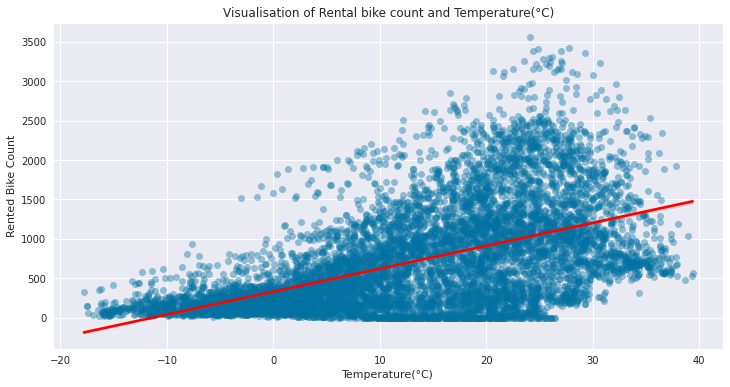

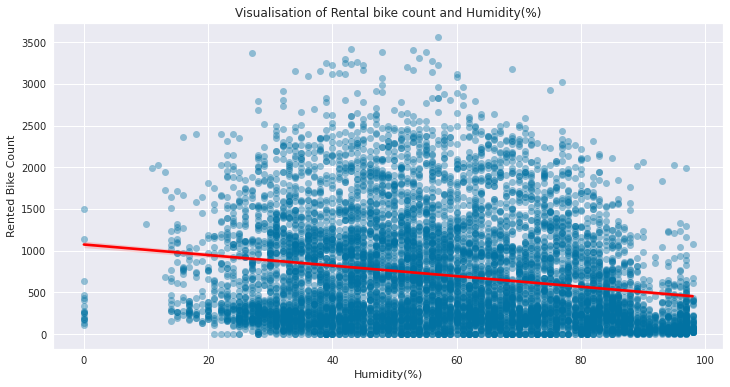

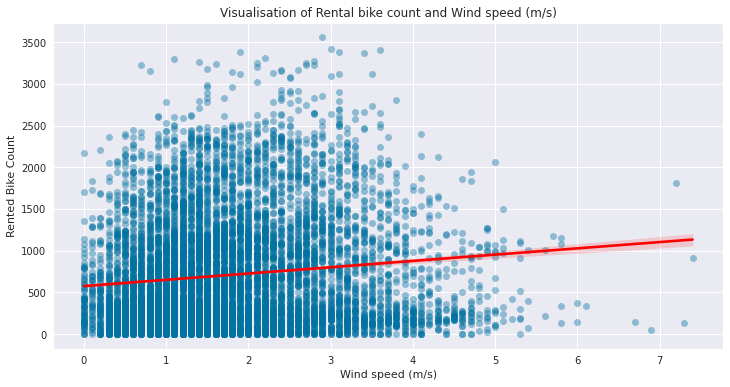

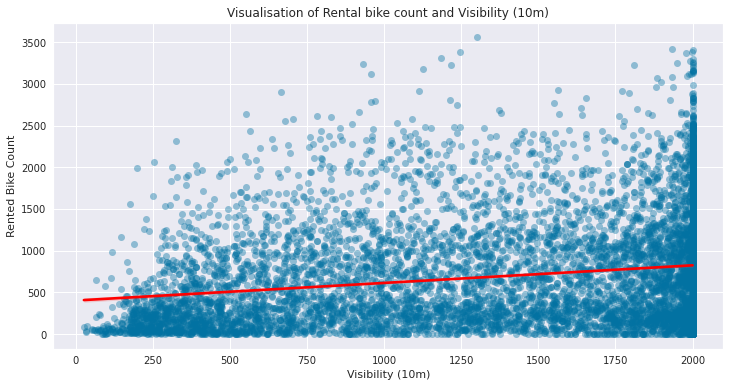

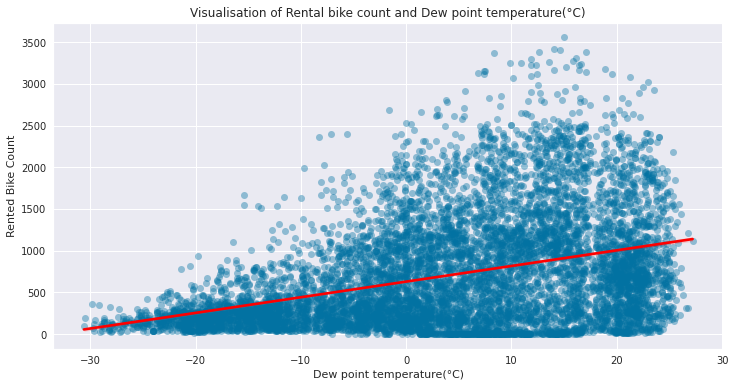

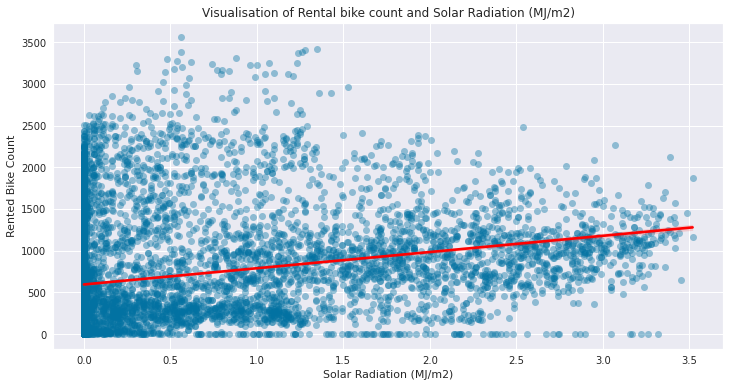

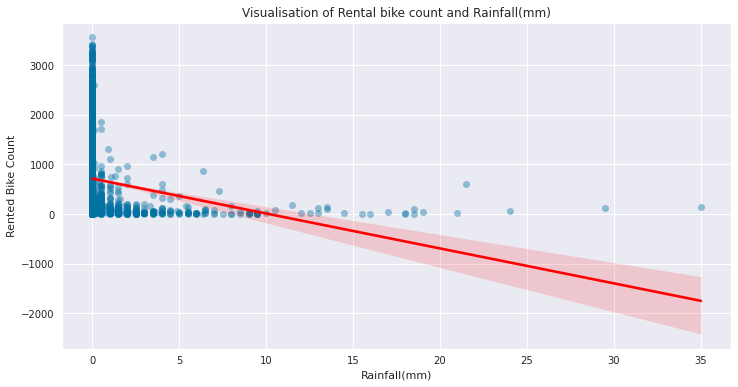

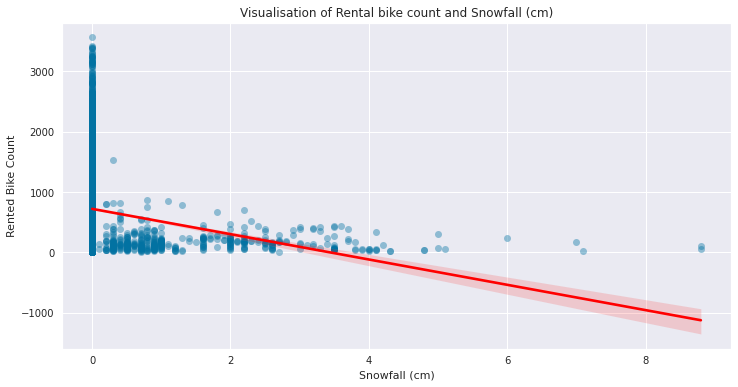

In [21]:
# Visualising the relation between bike count and continuous variables

for col in continuous_features:
  fig = plt.figure(figsize = (12, 6))
  ax = fig.gca()
  feature = bike_df[col]
  label = bike_df["Rented Bike Count"]
  sns.regplot(x = feature, y = label, scatter_kws = {"alpha": 0.4}, line_kws = {"color": "red"})
  ax.set_title("Visualisation of Rental bike count and " + col)
  
plt.show()

**Insights:**
* Most features appear to have a positive linear relationship with the dependent variable, apart from humidity, rainfall, and snowfall.
* Humidity, rainfall, and snowfall have a negative linear relationship with dependent variable.



It appears that continuous features have a linear relationship to rented bike count, I can use Linear Regression to create a simple baseline model to get a head start.

**2. Relation between Categorical variables and Dependent variable**



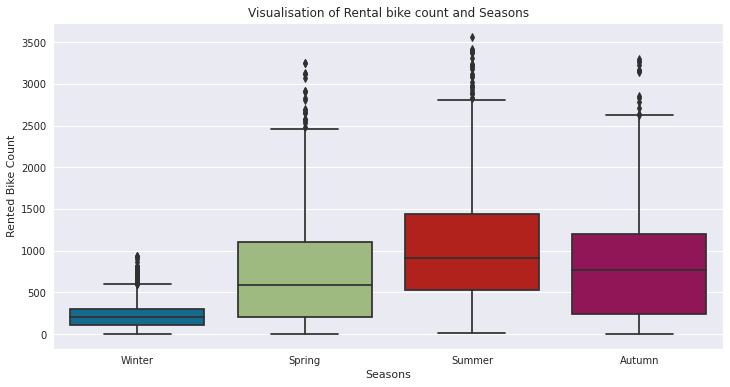

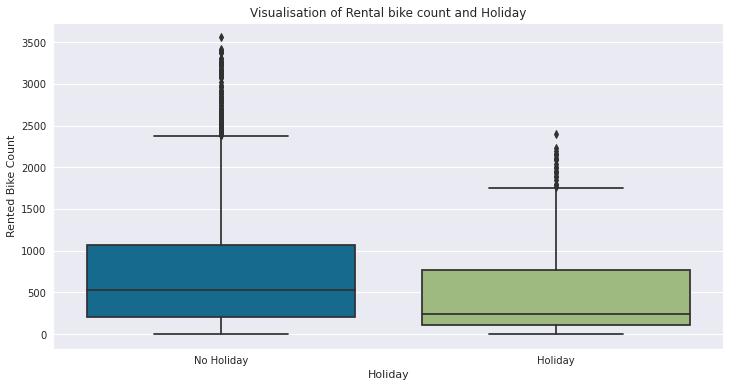

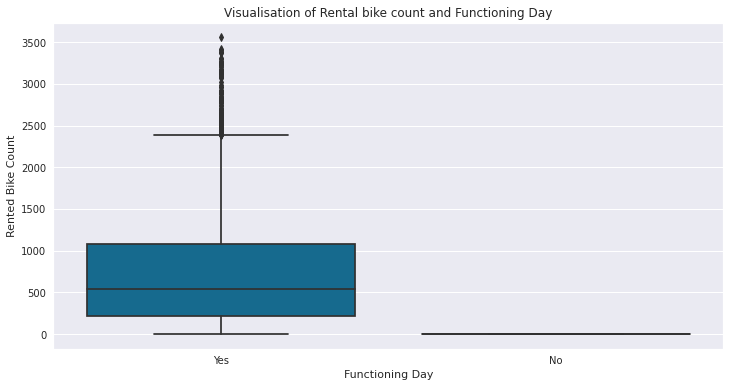

In [22]:
# Visualising the relation between rented bike count and categorical variables

for col in categorical_features:
  fig = plt.figure(figsize = (12, 6))
  ax = fig.gca()
  feature = bike_df[col]
  label = bike_df["Rented Bike Count"]
  sns.boxplot(x = feature, y = label)
  ax.set_title("Visualisation of Rental bike count and " + col)
  
plt.show()

**Insights:**
* In the summer and autumn, there is a large demand for bicycles, however in the winter, there is low demand.
* During the holidays, there is very little demand for bikes.
* On non-working days, bike demand is basically non-existent.
* There is a significant overlap in the distribution of sub-categories of Seasons and Holiday variables.

The distribution of these overlapped sub-categories in categorical features like Seasons and Holidays indicates that these sub-categories might be less useful for the models. I will, however, leave it up to our models to select which features are appropriate for them.

**3. Relation between Cyclical variables and Dependent variable**

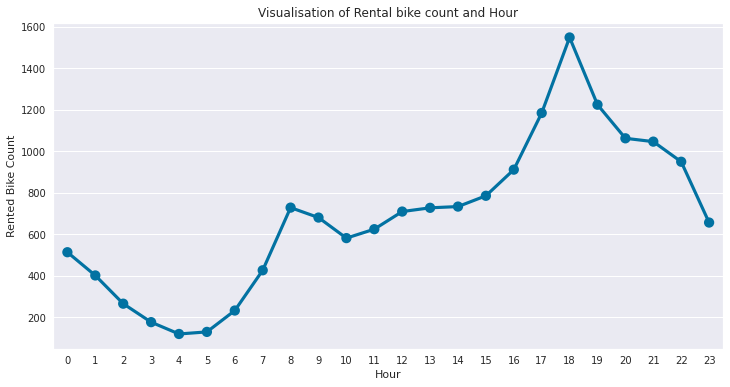

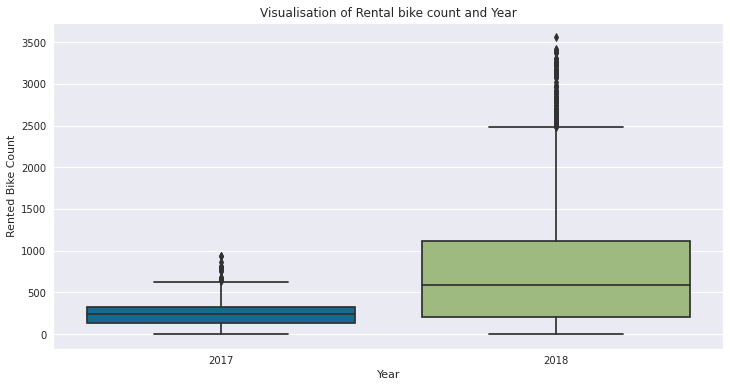

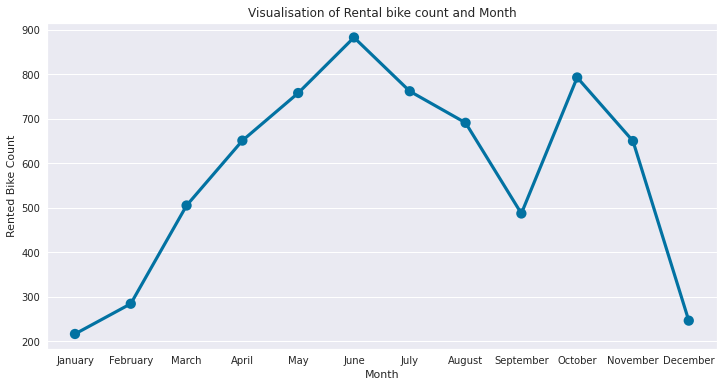

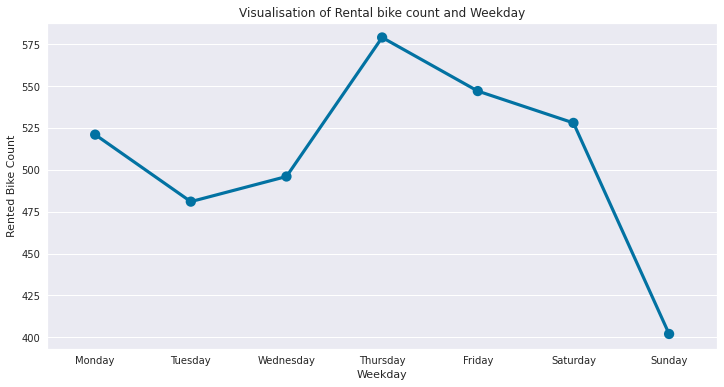

In [23]:
# Visualising the relation between rented bike count and categorical variables

months_order = ["January", "February", "March", "April", "May", "June", "July", 
                "August", "September", "October", "November", "December"]
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

for col in cyclical_features:
  fig = plt.figure(figsize = (12, 6))
  ax = fig.gca()
  df = bike_df.groupby(col)["Rented Bike Count"].median().round().reset_index().sort_values(by = "Rented Bike Count", ascending = False)
  feature = df[col]
  label = df["Rented Bike Count"]
  if col == "Month":
    sns.pointplot(x = feature, y = label, order = months_order)
  elif col == "Weekday":
    sns.pointplot(x = feature, y = label, order = days_order)
  elif col == "Hour":
    sns.pointplot(x = feature, y = label)
  else:
    sns.boxplot(x = bike_df[col], y = bike_df["Rented Bike Count"])
  ax.set_title("Visualisation of Rental bike count and " + col)
  
plt.show()

**Insights:**
* There is a noticeable increase in the number of rented bikes in the 8th and 18th hour of the day.
* When compared to 2017, the number of shared bikes on the road climbed dramatically in 2018.
* In the months of May, June, and July, there is a larger demand for bicycles.
* The demand for bicycles is highest on Thursdays and Fridays, and lowest on Sundays.

The cyclical features appear to have a significant impact on the rented bike count.

## **Multivariate Analysis**

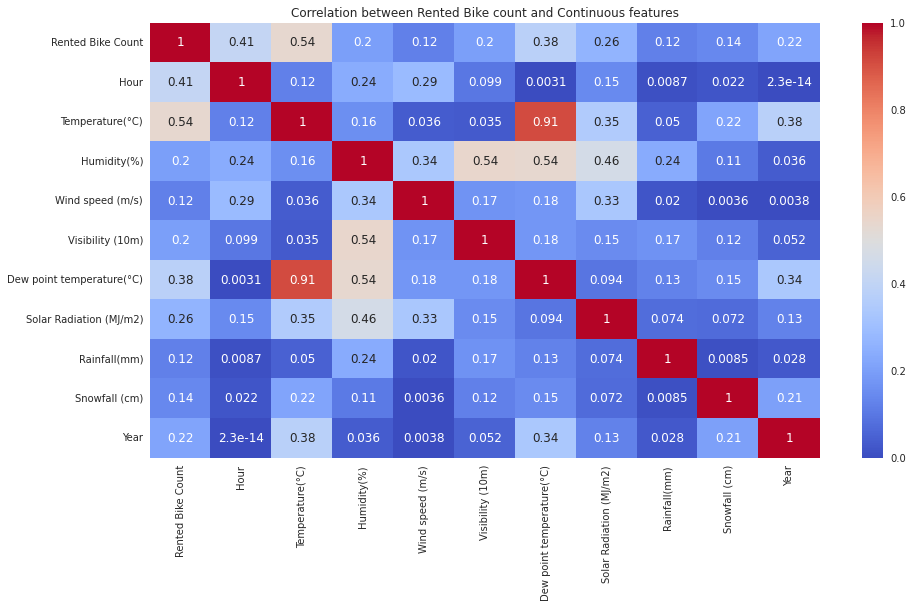

In [24]:
# Correlation matrix

plt.figure(figsize = (15, 8))
correlation = bike_df.corr()
sns.heatmap(abs(correlation), annot = True, cmap = "coolwarm")
plt.title("Correlation between Rented Bike count and Continuous features")

plt.show()

**Insights:**
* The number of rental bikes is highly correlated with hour and temperature. 
* Multicollinearity appears to exist in the data.





Although all continuous features appear to have a linear relationship with the dependent variable, only a few appear to be strongly correlated.

## **Checking Multicollinearity**

In [25]:
# Using VIF to detect multicollinearity

def cal_vif(X):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return vif

In [26]:
cal_vif(bike_df[[i for i in bike_df.describe().columns if i not in ["Rented Bike Count"]]])

,variables,VIF
0,Hour,4.450547
1,Temperature(°C),188.496720
2,Humidity(%),186.877169
3,Wind speed (m/s),4.811966
4,Visibility (10m),10.313000
5,Dew point temperature(°C),126.950456
6,Solar Radiation (MJ/m2),2.888695
7,Rainfall(mm),1.103251
8,Snowfall (cm),1.127819
9,Year,397.756221


Dew Point temperature and Year are highly correlated features. Therefore, I will drop both the features.

In [27]:
cal_vif(bike_df[[i for i in bike_df.describe().columns if i not in ["Rented Bike Count", "Dew point temperature(°C)", "Year"]]])

,variables,VIF
0,Hour,3.921832
1,Temperature(°C),3.228318
2,Humidity(%),4.868221
3,Wind speed (m/s),4.608625
4,Visibility (10m),4.710170
5,Solar Radiation (MJ/m2),2.246791
6,Rainfall(mm),1.079158
7,Snowfall (cm),1.120579


Features are now independent of one another.

# **Data Preparation**


In [28]:
# Encoding cyclical features into their numerical representation for later transformations

month_mapping = {"January": 0, "February": 1, "March": 2, "April": 3, "May": 4, "June": 5, "July": 6,
       "August": 7, "September": 8, "October": 9, "November": 10, "December": 11}
weekday_mapping = {"Monday": 0, "Tuesday": 1, "Wednesday": 2, "Thursday": 3, "Friday": 4, "Saturday": 5, "Sunday": 6}

bike_df["Month"] = bike_df["Month"].map(month_mapping)
bike_df["Weekday"] = bike_df["Weekday"].map(weekday_mapping)

In [29]:
# Performing mathematical(sine & cosine) transformation on cyclical features to generate new features

bike_df["hour_sin"] = np.sin(bike_df["Hour"] * (2 * np.pi /24))
bike_df["hour_cos"] = np.cos(bike_df["Hour"] * (2 * np.pi /24))
bike_df["month_sin"] = np.sin(bike_df["Month"] * (2 * np.pi / 12))
bike_df["month_cos"] = np.cos(bike_df["Month"] * (2 * np.pi / 12))
bike_df["weekday_sin"] = np.sin(bike_df["Weekday"] * (2 * np.pi / 7))
bike_df["weekday_cos"] = np.cos(bike_df["Weekday"] * (2 * np.pi / 7))

Sine and cosine transformations on cyclical features will depict these features as (x, y) coordinates of a circle, helping the algorithms to better interpret them as cyclic in nature, improving their prediction power.

In [30]:
# Dropping the few columns to avoid multicollinearity

bike_df.drop(columns = ["Dew point temperature(°C)", "Year", "Hour", "Month", "Weekday"], inplace = True) 
bike_df.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,hour_sin,hour_cos,month_sin,month_cos,weekday_sin,weekday_cos
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,0.000000,1.000000,0.0,1.0,0.433884,-0.900969
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,0.258819,0.965926,0.0,1.0,0.433884,-0.900969
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,0.500000,0.866025,0.0,1.0,0.433884,-0.900969
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,0.707107,0.707107,0.0,1.0,0.433884,-0.900969
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,0.866025,0.500000,0.0,1.0,0.433884,-0.900969


In [31]:
# Dividing the dataset into train and test set using random sampling

rng = np.random.RandomState(0)
train_set, test_set = train_test_split(bike_df, test_size = 0.2, random_state = rng)

In [32]:
# Separating the features and target labels from the training set and also applying square root transformation on the target label

bike_count = np.sqrt(train_set["Rented Bike Count"].copy())
features = train_set.drop(columns = "Rented Bike Count")

In [33]:
# Performing MinMaxScaling on numerical features of the training set to scale down in the range of between 0 and 1

num_attribs = features.describe().columns
scaler = MinMaxScaler()
features[num_attribs] = scaler.fit_transform(features[num_attribs])

In [34]:
# Separating the features and target labels from the test set and also applying square root transformation on the target label

test_bike_count = np.sqrt(test_set["Rented Bike Count"].copy())
test_features = test_set.drop(columns = "Rented Bike Count")

In [35]:
# Applying the MinMax scaling on the numerical features of the test set

test_features[num_attribs] = scaler.transform(test_features[num_attribs])

Applying these features scaling and sqrt transformation on numerical features and dependent variable respectively, would helps us in faster training and improved results.

In [36]:
# One-Hot Encoding of categorical features of both train and test set for linear and distance based models

lr_features = pd.get_dummies(features, columns = ["Seasons", "Functioning Day", "Holiday"], drop_first = True)
lr_test_features = pd.get_dummies(test_features, columns = ["Seasons", "Functioning Day", "Holiday"], drop_first = True)

For learning algorithms that either learn a single weight per feature (eg. Linear Regression) or use distance metrics between samples (KNeighbors Regressor), using one-hot encoding for categorical features would allow the representation of categorical data to be more expressive. Therefore, I will use one-hot encoded features when using these types of models.

In [37]:
# Ordinal encoding of categorical features of both train and test set for tree based models

seasons_mapping = {"Winter": 0, "Spring": 1, "Summer": 2, "Autumn": 3}
func_day_mapping = {"Yes": 1, "No": 0}
holiday_mapping = {"Holiday": 1, "No Holiday": 0}

tree_features = features.copy()
tree_test_features = test_features.copy()

tree_features["Seasons"] = tree_features["Seasons"].map(seasons_mapping)
tree_features["Functioning Day"] = tree_features["Functioning Day"].map(func_day_mapping)
tree_features["Holiday"] = tree_features["Holiday"].map(holiday_mapping)
tree_test_features["Seasons"] = tree_test_features["Seasons"].map(seasons_mapping)
tree_test_features["Functioning Day"] = tree_test_features["Functioning Day"].map(func_day_mapping)
tree_test_features["Holiday"] = tree_test_features["Holiday"].map(holiday_mapping)

Tree-based models, such as Decision Trees, Random Forests, and Boosted Trees, typically don't perform well with one-hot encodings as they pick the feature to split on based on how well that splitting the data on that feature will "purify" it. One-hot encoding creates lots of levels, so only a small fraction of the data (typically) will belong to any given level, so the one-hot encoded columns will be mostly zeros. Since splitting on this column will only produce a small gain, tree-based algorithms typically ignore the information in favour of other columns. As a result, for tree-based models, I will use ordinal encoded features.

# **Evaluation metric**

I will use root mean squared error to evaluate the performance of the ML models. It is the most widely used metric for assessing the accuracy of forecasts. It uses Euclidean distance to demonstrate how far predictions differ from measured true values.
The root mean square error is calculated as follows:

  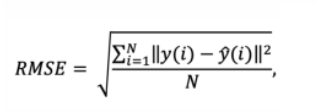

where N is the number of data points, y(i) is the ith measurement, and ŷ(i) is its corresponding prediction.
In RMSE as the errors are squared before they are averaged, it gives a relatively high weight to large errors which makes RMSE most useful when large errors are particularly undesirable.


# **Utils for Model training**

In [38]:
# Calculates the model's RMSE

def rmse(bike_count, bike_count_pred):
  bike_count = np.square(bike_count).round()                                            # Converting the bike_count into its original form
  bike_count_pred = np.square(bike_count_pred).round()                                  # Converting the predicted bike count into original form
  
  return mean_squared_error(bike_count, bike_count_pred, squared = False)

In [39]:
# Select the features using the estimators passed wrapped in RFE and visualize the results

def feature_selection(model, features, label):
  rfe = rfecv(estimator = model, X = features, y = label,
              scoring = make_scorer(rmse, greater_is_better = False), cv = 5)
  features_name = features.columns.tolist()
  cols, sel, rank = [], [], []
  for i in range(len(features_name)):
    cols.append(features_name[i])
    sel.append(rfe.support_[i])
    rank.append(rfe.ranking_[i])
  features_df = pd.DataFrame({"Columns": cols, "Selected": sel, "Rank": rank})
  selected_features = features_df[features_df["Selected"] == True]["Columns"].tolist()

  return selected_features

In [40]:
# Evaluates the performance of the model on the training and on cross-validation set

def evaluate(model, data_prepared, label_prepared, cross_val = False):
  if cross_val:
    model_scores = cross_val_score(model, data_prepared, label_prepared,
                                   scoring = make_scorer(rmse, greater_is_better = False), cv = 5)
    score = np.mean(-model_scores)
  else:
    bike_count_pred = model.predict(data_prepared)
    score = rmse(label_prepared, bike_count_pred)
    
  return score

In [41]:
# Visualize the learning curve of the model

def plot_learning_curves(model, data_prepared, label_prepared):
  visualizer = LearningCurve(model, scoring = make_scorer(rmse, greater_is_better = False), cv = 5)
  visualizer.fit(data_prepared, label_prepared) 
  
  visualizer.show()

In [42]:
# Visualize the validation curve 

def plot_validation_curve(model, data_prepared, label_prepared, param_dict):
  for param in param_dict:
    viz = validation_curve(
    model, data_prepared, label_prepared, param_name = param,
    param_range= param_dict[param], cv=5, scoring=make_scorer(rmse, greater_is_better = False))
    viz.fit(data_prepared, label_prepared)

  viz.show()

# **Model training**

**Note-** The rmse value in all feature selection, learning curves and validation curves is negative because I have used make scorer() with the parameter greater is better = False in parameters, which causes the scorer object to sign-flip the score func's result. 

## **Linear Regression**

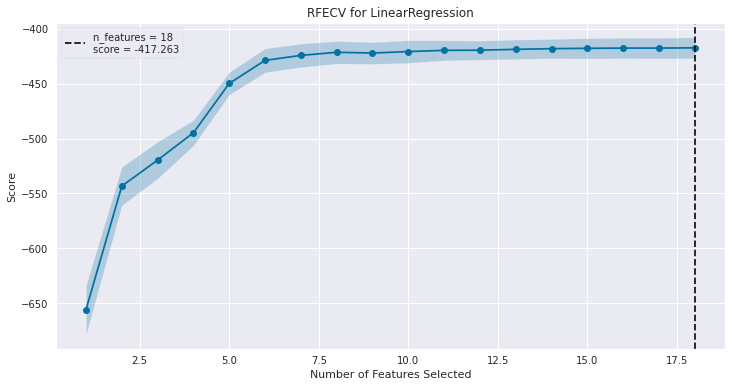

In [43]:
# Feature selection using Linear Regression wrapped in RFE

lr_selc_features = feature_selection(LinearRegression(), lr_features, bike_count)

In [44]:
# Displaying the selected features

lr_selc_features

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'hour_sin',
 'hour_cos',
 'month_sin',
 'month_cos',
 'weekday_sin',
 'weekday_cos',
 'Seasons_Spring',
 'Seasons_Summer',
 'Seasons_Winter',
 'Functioning Day_Yes',
 'Holiday_No Holiday']

In [45]:
# Final data prepared after feature selection

lr_data_prep = lr_features[lr_selc_features].copy()
lr_test_data_prep  = lr_test_features[lr_selc_features].copy()

In [46]:
# Training the Linear Regression model

lr = LinearRegression()
lr.fit(lr_data_prep, bike_count)

LinearRegression()

In [47]:
# Evaluating the performance of the model on training set

lr_rmse = evaluate(model = lr, data_prepared = lr_data_prep, label_prepared = bike_count)
lr_rmse

416.19439239407586

In [48]:
# Evaluating the performance of the model using cross-validation

lr_val_rmse = evaluate(model = lr, data_prepared = lr_data_prep, label_prepared = bike_count, cross_val = True)
lr_val_rmse

417.26329836671505

It seems that the Linear Regression model is underfitting the data.

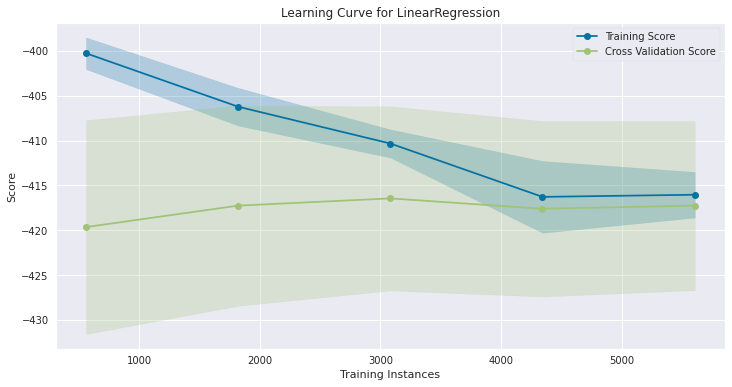

In [49]:
# Visualising the performance of the model on training and validation set using cross validation 

plot_learning_curves(model = lr, data_prepared = lr_data_prep, label_prepared = bike_count) 

By examining the learning curve, I can see that the model is suffering from high bias and that adding more data won't help the model perform better.

Adding more features, lowering regularization, and using a more powerful model are some strategies for reducing high bias. The first two alternatives are ruled out because I've already built new features and passed them to the model, and I'm already using an unregularized model. As a result, I will continue to try to improve the results by using more advanced algorithms.

## **KNeighbors Regressor**

In [50]:
# Copying the data

knn_data_prep = lr_features.copy()
knn_test_data_prep = lr_test_features.copy()

In [51]:
# Training the KNeighbors Regression model

knn = KNeighborsRegressor()
knn.fit(knn_data_prep, bike_count)

KNeighborsRegressor()

In [52]:
# Evaluating the performance of the model on training set

knn_rmse = evaluate(model = knn, data_prepared = knn_data_prep, label_prepared = bike_count)
knn_rmse

207.02413215773203

In [53]:
# Evaluating the performance of the model using cross-validation

knn_val_rmse = evaluate(model = knn, data_prepared = knn_data_prep, label_prepared = bike_count, cross_val = True)
knn_val_rmse

291.4021360816359

It seems that KNeighbors Regressor model is underfitted, but it still outperforms Linear Regression.

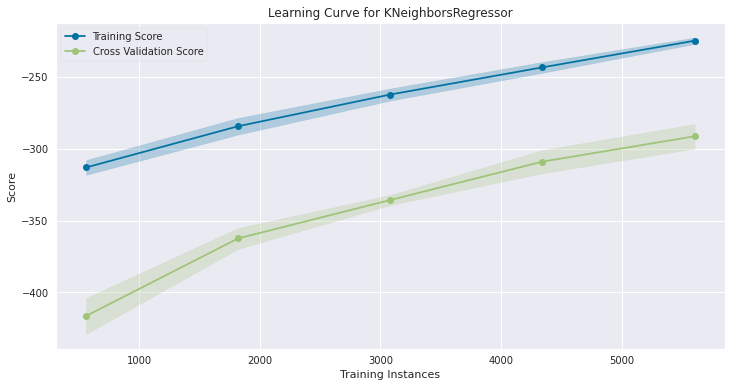

In [54]:
# Visualising the performance of the model on training and validation set using cross validation 

plot_learning_curves(model = knn, data_prepared = knn_data_prep, label_prepared = bike_count) 

By examining the learning curve, I can see that the model is suffering from high bias.

As previously stated, I've already built new features and passed them to the model, the two options are to tweak the model's hyperparameters to reduce underfitting or use a more complex algorithm.

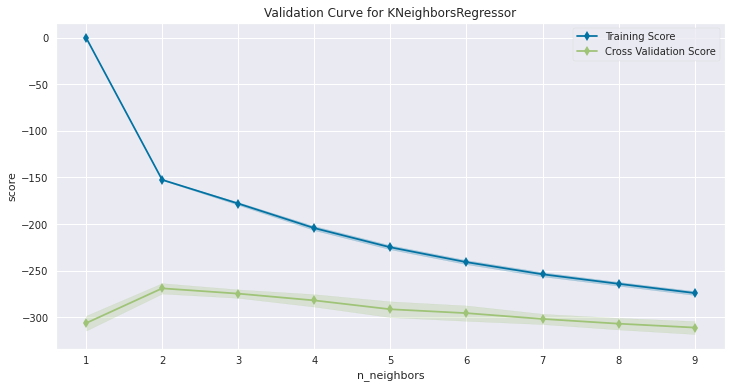

In [55]:
# Visualizing the validation curve for n_neighbors hyperparameter of the model

knn_param_dict = {"n_neighbors": range(1, 10)}
plot_validation_curve(model = knn, data_prepared = knn_data_prep, label_prepared = bike_count, param_dict = knn_param_dict)  

The validation curve for n_neighbors is visualized to assist in determining the best range of values for Grid Search hyperparameter tuning.

In [56]:
# Hyperparameter tuning using GridSearchCV

param_grid = {
    "n_neighbors": [2, 3, 4]
}

knn_grid = KNeighborsRegressor()
knn_search = GridSearchCV(knn_grid, param_grid, cv = 5, scoring = make_scorer(rmse, greater_is_better = False), return_train_score = True, refit = True)

knn_search.fit(knn_data_prep, bike_count)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4]}, return_train_score=True,
             scoring=make_scorer(rmse, greater_is_better=False))

In [57]:
# Displaying the best parameters

knn_search.best_params_

{'n_neighbors': 2}

In [58]:
# Evaluating the performance of hypertuned model on training set

hknn_rmse = evaluate(model = knn_search.best_estimator_, data_prepared = knn_data_prep, label_prepared = bike_count)
hknn_rmse

143.17703860452502

In [59]:
# Evaluating the performance of hypertuned model using cross-validation

hknn_val_rmse = evaluate(model = knn_search.best_estimator_, data_prepared = knn_data_prep, label_prepared = bike_count, cross_val = True)
hknn_val_rmse

268.97521147516426

Although hyperparameter tuning has improved the model's performance, there is still room for improvement because the model is still underfitted.  As a result, I'll move forward to experiment with other algorithms to succeed.

## **Decision Tree Regressor**

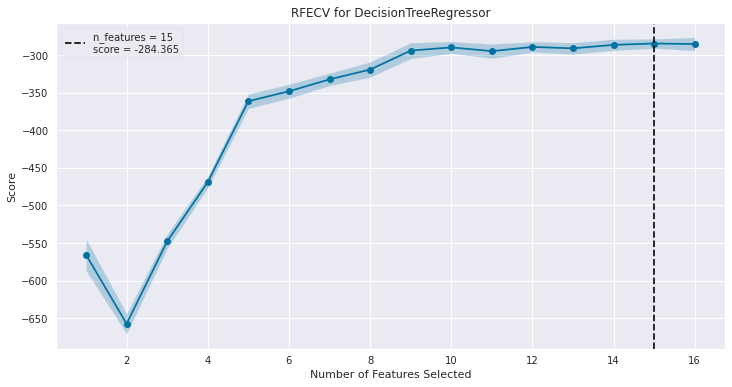

In [60]:
# Feature selection using Decision Tree wrapped in RFE

tree_selc_features = feature_selection(DecisionTreeRegressor(random_state = rng), tree_features, bike_count)

In [61]:
# Displaying the selected features

tree_selc_features

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Seasons',
 'Holiday',
 'Functioning Day',
 'hour_sin',
 'hour_cos',
 'month_sin',
 'month_cos',
 'weekday_sin',
 'weekday_cos']

In [62]:
# Final data prepared after feature selection

tree_data_prep = tree_features[tree_selc_features].copy()
tree_test_data_prep  = tree_test_features[tree_selc_features].copy()

In [63]:
# Training the Decision Tree model

tree = DecisionTreeRegressor(random_state = rng)
tree.fit(tree_data_prep, bike_count)

DecisionTreeRegressor(random_state=RandomState(MT19937) at 0x7FB6D153BE20)

In [64]:
# Evaluating the performance of the model on training set

tree_rmse = evaluate(model = tree, data_prepared = tree_data_prep, label_prepared = bike_count)
tree_rmse

0.0

In [65]:
# Evaluating the performance of the model using cross-validation

tree_val_rmse = evaluate(model = tree, data_prepared = tree_data_prep, label_prepared = bike_count, cross_val = True)
tree_val_rmse

283.17154066161305

Decision Tree appears to be overfitting the data, despite generating better results than Linear Regression and results that are quite similar to KNeighbors Regression on validation set.

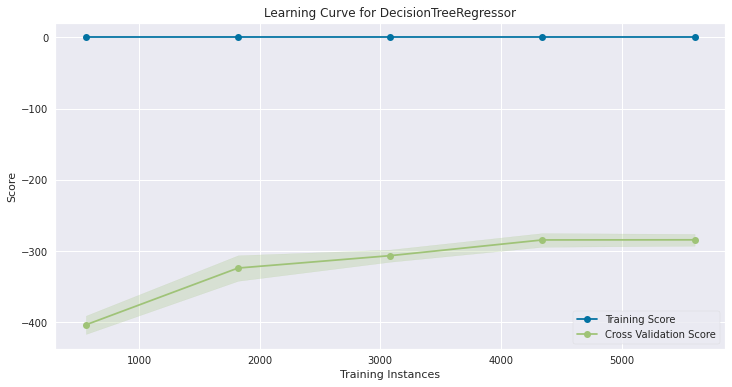

In [66]:
# Visualising the performance of the model on training and validation set using cross validation 

plot_learning_curves(model = tree, data_prepared = tree_data_prep, label_prepared = bike_count)

By examining the learning curve, I can see that the model is suffering from high variance and that adding more data could help it perform better.

Adding more data and performing feature selection are two strategies to reduce overfitting. However, I will rule out these two alternatives to reduce overfitting because I have already used 80% of the data provided for training and have also performed feature selection. As a result, I'll try to tweak the model's hyperparameters to reduce overfitting.

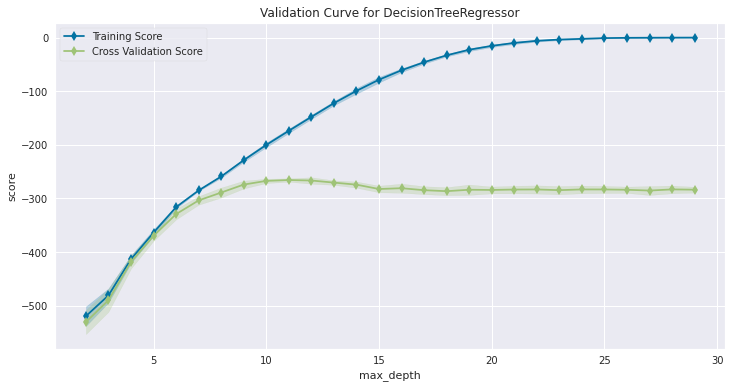

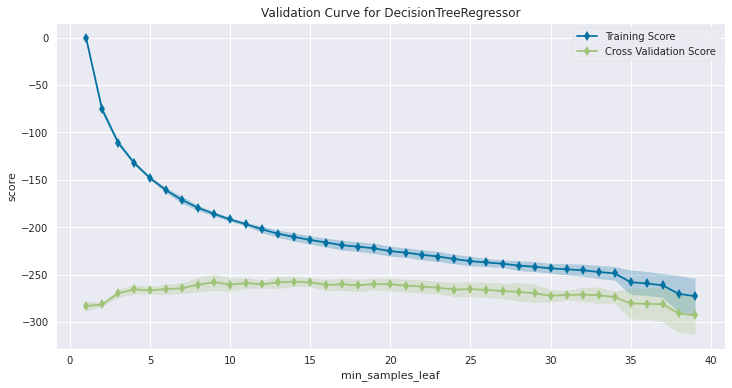

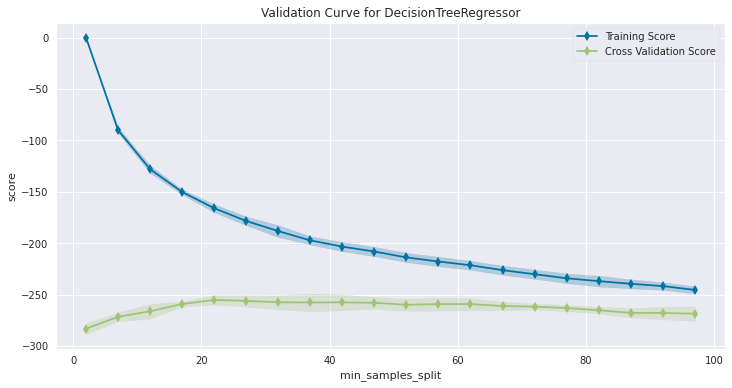

In [67]:
# Visualizing the validation curve for various hyperparameter of the model

tree_param_dict = {"max_depth": range(2, 30), "min_samples_leaf": range(1, 40), "min_samples_split": range(2, 100, 5)}
plot_validation_curve(model = tree, data_prepared = tree_data_prep, label_prepared = bike_count, param_dict = tree_param_dict)  

The validation curves for various hyperparameters of Decision Tree are visualized to assist in determining the best range of values for Grid Search hyperparameter tuning.

In [68]:
# Hyperparameter tuning using GridSearchCV

param_grid = {
    "max_depth": [max_depth for max_depth in range(10, 15)],
    "min_samples_leaf": [min_samples_leaf for min_samples_leaf in range(9, 15, 2)],
    "min_samples_split": [min_samples_split for min_samples_split in range(32, 47, 2)], 
}

tree_grid = DecisionTreeRegressor(random_state = rng)
tree_search = GridSearchCV(tree_grid, param_grid, cv = 5, scoring = make_scorer(rmse, greater_is_better = False), return_train_score = True, refit = True)

tree_search.fit(tree_data_prep, bike_count)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(random_state=RandomState(MT19937) at 0x7FB6D153BE20),
             param_grid={'max_depth': [10, 11, 12, 13, 14],
                         'min_samples_leaf': [9, 11, 13],
                         'min_samples_split': [32, 34, 36, 38, 40, 42, 44, 46]},
             return_train_score=True,
             scoring=make_scorer(rmse, greater_is_better=False))

In [69]:
# Displaying the best paramaters

tree_search.best_params_

{'max_depth': 14, 'min_samples_leaf': 13, 'min_samples_split': 46}

In [70]:
# Evaluating the performance of hypertuned model on training set

htree_rmse = evaluate(tree_search.best_estimator_, tree_data_prep, bike_count)
htree_rmse

220.07221177631382

In [71]:
# Evaluating the performance of the model using cross-validation

htree_val_rmse = evaluate(tree_search.best_estimator_, tree_data_prep, bike_count, cross_val = True)
htree_val_rmse

256.7688202249671

Although hyperparameter tuning improves the model's performance on the validation set, it has the opposite effect on the training set. As a result, when compared to KNeighbors Regressor, the model's overall performance falls behind. As a result, I'm going to try out an ensemble model to see if I can improve the performance.

## **Random Forest Regressor**

In [72]:
# Copying the data

rf_features = tree_features.copy()
rf_test_features = tree_test_features.copy()

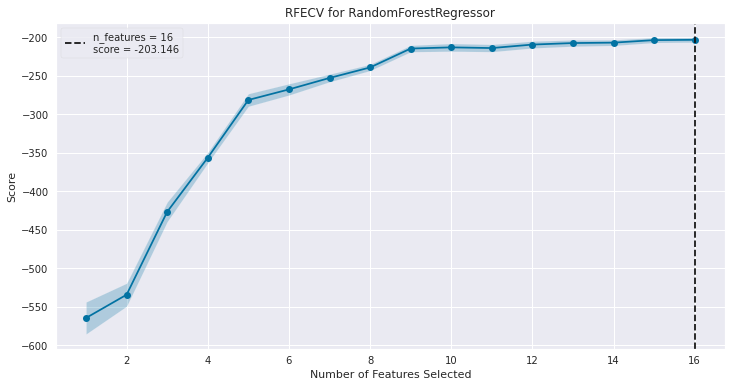

In [73]:
# Feature selection using Random Forest wrapped in RFE

rf_selc_features = feature_selection(RandomForestRegressor(random_state = rng), rf_features, bike_count)

In [74]:
# Displaying the selected features

rf_selc_features

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day',
 'hour_sin',
 'hour_cos',
 'month_sin',
 'month_cos',
 'weekday_sin',
 'weekday_cos']

In [75]:
# Final data prepared after feature selection

rf_data_prep = rf_features[rf_selc_features].copy()
rf_test_data_prep  = rf_test_features[rf_selc_features].copy()

In [76]:
# Training the Random Forest model

rf = RandomForestRegressor(random_state = rng)
rf.fit(rf_data_prep, bike_count)

RandomForestRegressor(random_state=RandomState(MT19937) at 0x7FB6D153BE20)

In [77]:
# Evaluating the performace of the model on the training set

rf_rmse = evaluate(model = rf, data_prepared = rf_data_prep, label_prepared = bike_count)
rf_rmse

73.6871868953964

In [78]:
# Evaluating the performance of the model using cross validation

rf_val_rmse = evaluate(model = rf, data_prepared = rf_data_prep, label_prepared = bike_count, cross_val = True)
rf_val_rmse

202.30884526497394

Despite Random Forest looking to be overfitting the data, it appears to be the most promising model trained so far.

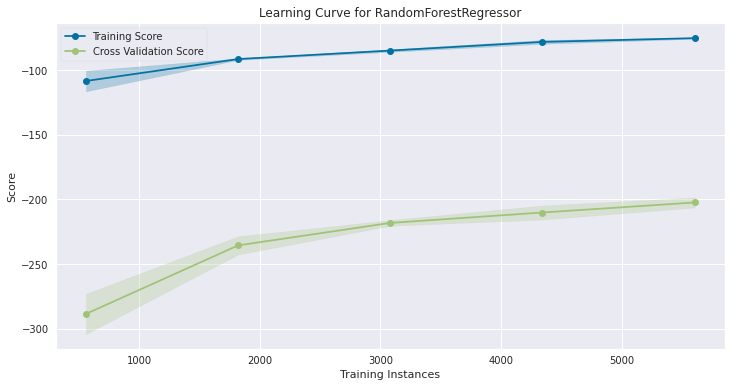

In [79]:
# Visualising the performance of the model on training and validation set using cross validation 

plot_learning_curves(model = rf, data_prepared = rf_data_prep, label_prepared = bike_count)

By examining the learning curve, I can see that the model is suffering from high variance.

 Once again, I'll strive to reduce overfitting by tweaking the model's hyperparameters.

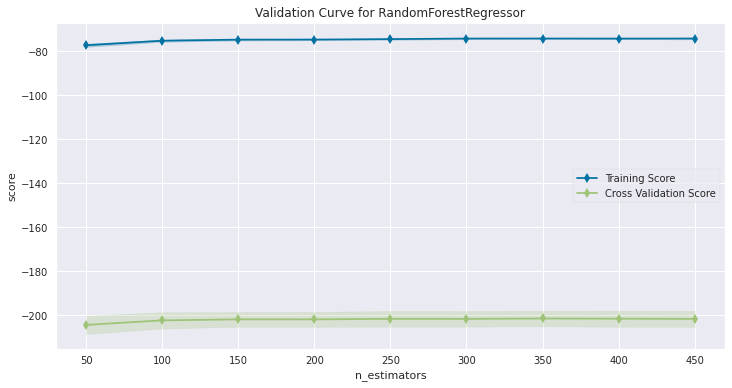

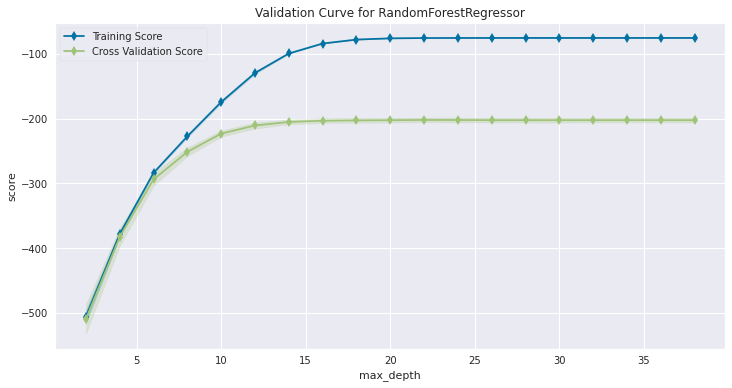

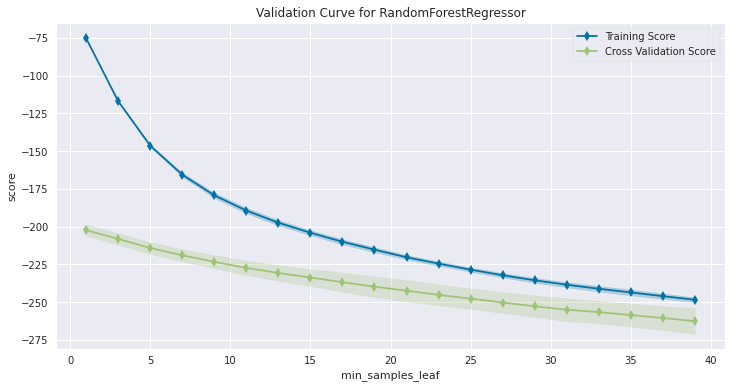

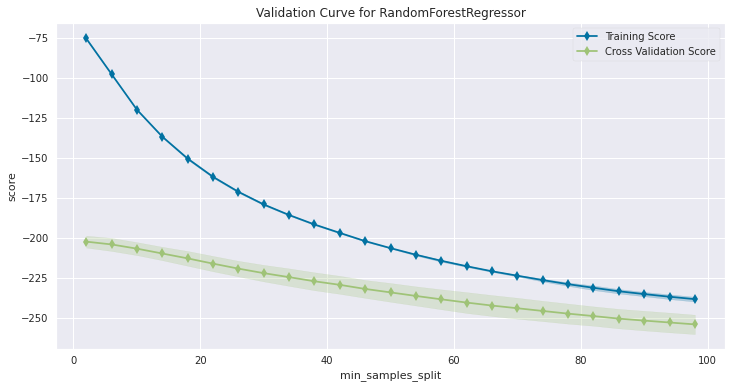

In [80]:
# Visualizing the validation curve for various hyperparameter of the model

rf_param_dict = {"n_estimators": range(50, 500, 50), "max_depth": range(2, 40, 2), "min_samples_leaf": range(1, 40, 2), "min_samples_split": range(2, 100, 4)}
plot_validation_curve(model = rf, data_prepared = rf_data_prep, label_prepared = bike_count, param_dict = rf_param_dict)  

The validation curves for various hyperparameters of Random Forest are visualized to assist us to determine the best range of values for grid search.

In [81]:
# Hyperparameter tuning using GridSearchCV

param_grid = {
    "n_estimators": [n_estimator for n_estimator in range(250, 500, 50)],
    "max_depth": [max_depth for max_depth in range(20, 30, 2)],
    "min_samples_leaf" : [min_samples_leaf for min_samples_leaf in range(1, 4)],
}

rf_grid = RandomForestRegressor(random_state = rng)
rf_search = GridSearchCV(rf_grid, param_grid, cv = 5, scoring = make_scorer(rmse, greater_is_better = False), return_train_score = True, refit = True)

rf_search.fit(rf_data_prep, bike_count)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(random_state=RandomState(MT19937) at 0x7FB6D153BE20),
             param_grid={'max_depth': [20, 22, 24, 26, 28],
                         'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [250, 300, 350, 400, 450]},
             return_train_score=True,
             scoring=make_scorer(rmse, greater_is_better=False))

In [82]:
# Displaying the best paramaters

rf_search.best_params_

{'max_depth': 24, 'min_samples_leaf': 1, 'n_estimators': 350}

In [83]:
# Evaluating the performace of the hypertuned model on the training set

hrf_rmse = evaluate(model = rf_search.best_estimator_, data_prepared = rf_data_prep, label_prepared = bike_count)
hrf_rmse

72.24517490326708

In [84]:
# Evaluating the performance of the hypertuned model using cross validation

hrf_val_rmse = evaluate(model = rf_search.best_estimator_, data_prepared = rf_data_prep, label_prepared = bike_count, cross_val = True)
hrf_val_rmse

202.27997690766162

There is a minor improvement in the model's performance after tweaking the Random Forest. Despite the fact that the model is still overfitted, it outperforms all preceding models. I'm going to stop experimenting now because feeding more data would only improve performance with the current computational resources.As a result, I'll go with Random Forest as my best model.

# **Feature Importance**

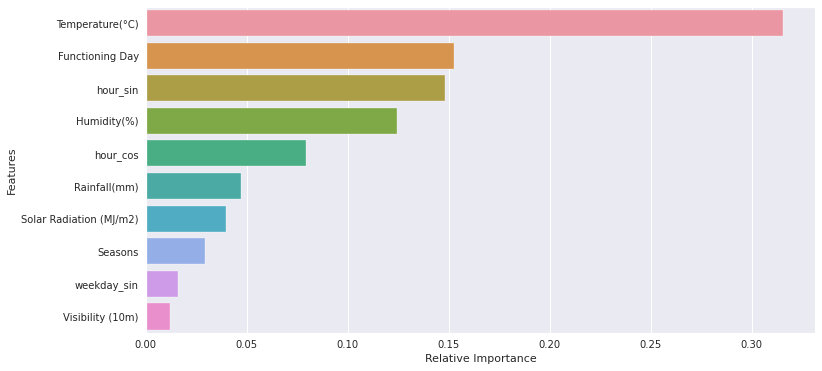

In [85]:
# Feature importance according to the best model

rf_importance = rf_search.best_estimator_.feature_importances_

importance_dict = {"Features": rf_selc_features, "Relative Importance": rf_importance}
importance_df = pd.DataFrame(importance_dict).sort_values(by=['Relative Importance'], ascending=False).head(10)
sns.barplot(x = "Relative Importance", y = "Features", data = importance_df)
plt.show()

The above visualisation shows the most important features on which bike count depends.

# **Model Evaluation on Test set**

In [86]:
# Evaluating the performance of the best model on test set

pred = rf_search.best_estimator_.predict(rf_test_data_prep)
rmse(test_bike_count, pred)

205.68857932969118

# **Conclusion**

The following points are concluded from the project to improve the supply of rental bikes as well as the growth of the rental bikes business:

1. As the temperature rises, the number of bikes increases, which could be useful for establishing new rental stations in hotter areas as well as maintaining bike supply in hotter areas.
2. Companies renting bikes should maintain more supply on Functional days and can have maintenance of the bikes on non-functional days to decrease the downtime in business.
3. There is a high demand for bicycles during the 8th and 18th hours of the day, so there should be sufficient bikes to increase the business and the price of the bike could also be high during these hours.
4. As bike demand rises in the summer and autumn seasons, prices should fall in the winter to increase the use of bikes in winters.
